# Recreate Figure 5

The purpose of this notebook is to combine all the digital gene expression data for the retina cells, downloaded from the Gene Expression Omnibus using the accession number [GSE63473](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE63473).

In [1]:
import altair
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the plotting style as for a "paper" (smaller labels) 
# and using a white background with a grid ("whitegrid")
sns.set(context='paper', style='whitegrid')

%matplotlib inline

We'll import the `macosko2015` package, which contains a URL pointing to where we've created clean data

In [2]:
import macosko2015
macosko2015.BASE_URL

'https://media.githubusercontent.com/media/olgabot/macosko2015/master/data/05_make_rentina_subsets_for_teaching/'

We've created a subset of the data that contains all the cells from batch 1, and only the differentially expressed genes. This is still pretty big!!

In [3]:
urlname = macosko2015.BASE_URL + 'differential_clusters_expression.csv'
urlname

'https://media.githubusercontent.com/media/olgabot/macosko2015/master/data/05_make_rentina_subsets_for_teaching/differential_clusters_expression.csv'

In [4]:
expression = pd.read_csv(urlname, index_col=0)
print(expression.shape)
expression.head()

(6020, 1339)


,1500015O10RIK,1500016L03RIK,1700025G04RIK,1810009A15RIK,1810037I17RIK,2010107E04RIK,2410066E13RIK,2610017I09RIK,2900011O08RIK,4632428N05RIK,...,ZFHX4,ZFP36,ZFP365,ZFP36L1,ZFP804A,ZIC1,ZIC4,ZMAT4,ZWINT,ZYX
r1_GGCCGCAGTCCG,0,0,5,4,7,28,5,0,33,0,...,3,0,7,0,0,0,0,7,53,0
r1_CTTGTGCGGGAA,0,0,9,4,4,33,4,0,43,0,...,8,0,4,0,0,0,0,5,65,1
r1_GCGCAACTGCTC,0,0,11,1,4,26,2,0,30,0,...,0,0,2,0,0,0,0,4,38,0
r1_GATTGGGAGGCA,0,0,8,2,5,14,6,0,20,0,...,1,0,1,0,0,1,0,3,17,0
r1_GTGCCGCCTCTC,0,0,1,19,1,13,0,0,0,0,...,0,0,3,0,0,0,0,0,3,0


For later, let's also make a logged version the expression matrix:

In [5]:
expression_log10 = np.log10(expression + 1)
print(expression_log10.shape)
expression_log10.head()

(6020, 1339)


,1500015O10RIK,1500016L03RIK,1700025G04RIK,1810009A15RIK,1810037I17RIK,2010107E04RIK,2410066E13RIK,2610017I09RIK,2900011O08RIK,4632428N05RIK,...,ZFHX4,ZFP36,ZFP365,ZFP36L1,ZFP804A,ZIC1,ZIC4,ZMAT4,ZWINT,ZYX
r1_GGCCGCAGTCCG,0.0,0.0,0.778151,0.698970,0.903090,1.462398,0.778151,0.0,1.531479,0.0,...,0.602060,0.0,0.903090,0.0,0.0,0.00000,0.0,0.903090,1.732394,0.00000
r1_CTTGTGCGGGAA,0.0,0.0,1.000000,0.698970,0.698970,1.531479,0.698970,0.0,1.643453,0.0,...,0.954243,0.0,0.698970,0.0,0.0,0.00000,0.0,0.778151,1.819544,0.30103
r1_GCGCAACTGCTC,0.0,0.0,1.079181,0.301030,0.698970,1.431364,0.477121,0.0,1.491362,0.0,...,0.000000,0.0,0.477121,0.0,0.0,0.00000,0.0,0.698970,1.591065,0.00000
r1_GATTGGGAGGCA,0.0,0.0,0.954243,0.477121,0.778151,1.176091,0.845098,0.0,1.322219,0.0,...,0.301030,0.0,0.301030,0.0,0.0,0.30103,0.0,0.602060,1.255273,0.00000
r1_GTGCCGCCTCTC,0.0,0.0,0.301030,1.301030,0.301030,1.146128,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.602060,0.0,0.0,0.00000,0.0,0.000000,0.602060,0.00000


Now let's read the cell metadata

In [6]:
urlname = macosko2015.BASE_URL + 'differential_clusters_cell_metadata.csv'
cell_metadata = pd.read_csv(urlname, index_col=0)
cell_metadata.head()

,cluster_id,celltype,cluster_n,cluster_celltype_with_id
r1_GGCCGCAGTCCG,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_CTTGTGCGGGAA,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_GCGCAACTGCTC,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_GATTGGGAGGCA,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_GTGCCGCCTCTC,cluster_25,Cones,25,Cones (cluster_25)


## Figure 5a

For this figure, the caption is:

> (A) Pan-amacrine markers. The expression levels of the six genes identified (Nrxn2, Atp1b1, Pax6, Slc32a1, Slc6a1, Elavl3) are represented as dot plots across all 39 clusters; larger dots indicate broader expression within the cluster; deeper red denotes a higher expression level.

I wonder, how did they aggregate their expression per cluster? Mean, median, or mode? Did they log their data? We'll find out :)

![Macosko2015 figure 5a](figures/macosko2015_figure5a.png)

You may have noticed that while the gene names are Captialcase in the paper, they're all uppercase in the data. So first, we'll define a function called `upperizer` that will make our gene names uppercase.

Then, we'll make a list of genes for Figure 5a

In [7]:
def upperizer(genes):
    return [x.upper() for x in genes]

figure5a_genes = ['Nrxn2', 'Atp1b1', 'Pax6', 'Slc32a1', 'Slc6a1', 'Elavl3']
figure5a_genes_upper = upperizer(figure5a_genes)
figure5a_genes_upper

['NRXN2', 'ATP1B1', 'PAX6', 'SLC32A1', 'SLC6A1', 'ELAVL3']

### Exercise 1

Make a subset of the data called `figure5a_expression` that contains only the genes from `figure5a_genes_upper` - Remember, genes are columns! How do you select only certain columns for pandas dataframes?

In [8]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [9]:
figure5a_expression = expression[figure5a_genes_upper]
print(figure5a_expression.shape)
figure5a_expression.head()

(6020, 6)


,NRXN2,ATP1B1,PAX6,SLC32A1,SLC6A1,ELAVL3
r1_GGCCGCAGTCCG,16,149,8,0,1,13
r1_CTTGTGCGGGAA,16,182,21,0,10,5
r1_GCGCAACTGCTC,7,119,10,0,5,4
r1_GATTGGGAGGCA,12,93,7,0,3,7
r1_GTGCCGCCTCTC,0,0,0,0,0,0


We will use a function called `groupby` to grab the cells from each cluster, and use `.mean()`

In [10]:
figure5a_expression_mean = figure5a_expression.groupby(cell_metadata['cluster_n'], axis=0).mean()
print(figure5a_expression_mean.shape)
figure5a_expression_mean.head()

(39, 6)


,NRXN2,ATP1B1,PAX6,SLC32A1,SLC6A1,ELAVL3
cluster_n,,,,,,
1,2.037037,15.555556,2.074074,1.296296,0.000000,1.629630
2,2.385714,27.457143,1.785714,0.000000,0.757143,1.885714
3,1.409091,10.772727,1.454545,1.568182,2.090909,1.477273
4,1.846154,2.230769,5.692308,0.615385,1.000000,0.846154
5,3.222222,10.111111,4.888889,1.944444,3.944444,1.888889


## Tidy data

To make this "punchcard" style figure, we will use the program `altair`. To use this program, we need to reshape our data into a tall, ["tidy" data format](http://vita.had.co.nz/papers/tidy-data.html), where each row is an observation, and each column is a variable:

![Tidy data](http://r4ds.had.co.nz/images/tidy-1.png)

Source: http://r4ds.had.co.nz/tidy-data.html

First, we will `unstack` our data, which will make a very long column of gene expression, where the gene name and cluster number is the `index`.

In [11]:
figure5a_expression_mean_unstack = figure5a_expression_mean.unstack()
print(figure5a_expression_mean_unstack.shape)
figure5a_expression_mean_unstack.head()

(234,)


       cluster_n
NRXN2  1            2.037037
       2            2.385714
       3            1.409091
       4            1.846154
       5            3.222222
dtype: float64

Now let's use the function `reset_index`, which will take everything that was an `index` and now make it a column:

In [12]:
figure5a_expression_tidy = figure5a_expression_mean_unstack.reset_index()
print(figure5a_expression_tidy.shape)
figure5a_expression_tidy.head()

(234, 3)


,level_0,cluster_n,0
0,NRXN2,1,2.037037
1,NRXN2,2,2.385714
2,NRXN2,3,1.409091
3,NRXN2,4,1.846154
4,NRXN2,5,3.222222


But our column names aren't so nice anymore ... let's create a `dict` to map the old column name to a new, nicer one.

In [13]:
renamer = {'level_0': 'gene_symbol', 0: 'expression'}
renamer

{'level_0': 'gene_symbol', 0: 'expression'}

We can use the dataframe function `.rename()` to rename our columns:

In [14]:
figure5a_expression_tidy = figure5a_expression_tidy.rename(columns=renamer)
print(figure5a_expression_tidy.shape)
figure5a_expression_tidy.head()

(234, 3)


,gene_symbol,cluster_n,expression
0,NRXN2,1,2.037037
1,NRXN2,2,2.385714
2,NRXN2,3,1.409091
3,NRXN2,4,1.846154
4,NRXN2,5,3.222222


Let's also add a log expression column, just in case :)

In [15]:
figure5a_expression_tidy['expression_log'] = np.log10(figure5a_expression_tidy['expression'] + 1)
print(figure5a_expression_tidy.shape)
figure5a_expression_tidy.head()

(234, 4)


,gene_symbol,cluster_n,expression,expression_log
0,NRXN2,1,2.037037,0.482450
1,NRXN2,2,2.385714,0.529650
2,NRXN2,3,1.409091,0.381853
3,NRXN2,4,1.846154,0.454258
4,NRXN2,5,3.222222,0.625541


In [16]:
altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_n'))

/Users/olgabot/anaconda3/envs/macosko2015-env/lib/python3.6/site-packages/altair/utils/core.py:110: FutureWarning: pandas.lib is deprecated and will be removed in a future version.
You can access infer_dtype as pandas.api.types.infer_dtype
  typ = pd.lib.infer_dtype(data)


### Exercise 2

Make the same plot, but use the logged expression column

In [17]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

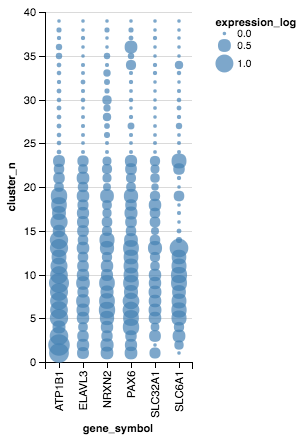

In [18]:
altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='expression_log', x=altair.X('gene_symbol'), y=altair.Y('cluster_n'))

### Bonus exercise (if you're feeling ahead)

Try the same thing, but with:

- **Median** within clusters, raw counts
- **Median** within clusters, log expression

## Figure 5b

Here, we will make violinplots of specific genes within our dataset.

The caption of this figure is:

> (B) Identification of known amacrine types among clusters. The 21 amacrine clusters consisted of 12 GABAergic, five glycinergic, one glutamatergic, and three non-GABAergic non-glycinergic clusters. Starburst amacrines were identified in cluster 3 by their expression of Chat; excitatory amacrines by expression of Slc17a8; A-II amacrines by their expression of Gjd2; and SEG amacrine neurons by their expression of Ebf3.

![Macosko2015 Figure 5b](figures/macosko2015_figure5b.png)

### Exercise 3

1. Make a subset of genes called `figure5b_genes` using the gene names from the paper figure. 
    * You may want to use the `upperizer()` function we used before

Use as many code cells as you need

In [19]:
# YOUR CODE HERE

In [20]:
# YOUR CODE HERE

In [21]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [22]:
figure5b_genes = ['Chat', "Gad1", 'Gad2', 'Slc17a8', 'Slc6a9', 'Gjd2', 'Gjd2', 'Ebf3']
figure5b_genes_upper = upperizer(figure5b_genes)
figure5b_genes_upper

['CHAT', 'GAD1', 'GAD2', 'SLC17A8', 'SLC6A9', 'GJD2', 'GJD2', 'EBF3']

Now that we have the genes we want, let's get the cells we want!

We can use the `range` function in Python to get numbers in order

In [23]:
range(5)

range(0, 5)

Now this returns a "range object" which means Python is being lazy and not telling us what's inside. To force Python into action, we can use `list`:

In [24]:
list(range(5))

[0, 1, 2, 3, 4]

So this is getting us all numbers from 0 to 4 (not including 5). We can use this group of numbers to subset our cell metadata! Let's make a variable called `rows` that contains `True`/`False` values telling us whether the cells are in that cluster number:

In [25]:
rows = cell_metadata.cluster_n.isin(range(5))
rows

r1_GGCCGCAGTCCG     True
r1_CTTGTGCGGGAA     True
r1_GCGCAACTGCTC     True
r1_GATTGGGAGGCA     True
r1_GTGCCGCCTCTC    False
r1_CCTGTGACACAC     True
r1_AATCTCGTTAAT     True
r1_GATTTCCTCTGA     True
r1_GAAGGCTGGAAC     True
r1_TTCCGGCTGTAC     True
r1_TCGACTTCTTCT     True
r1_TGTGGATCTGCT     True
r1_GGGCCACGATCA     True
r1_GATTACTGAGCT     True
r1_CGAGATATAGCA     True
r1_GGGTGTCAGTGG    False
r1_TGCGAGAGCTTG    False
r1_GCTTCTTGTCCT     True
r1_GTTTATATGCGC    False
r1_TCTTCACTGGCT    False
r1_TCATTTAGTCGA    False
r1_GCGCCGAGATGT    False
r1_TAGATTATTCAT    False
r1_GTCTATTCGGTT    False
r1_TTCTTTTTTCAA    False
r1_GTTATACTACCG     True
r1_CCAATTTCTAAT    False
r1_CGAATTGGTCGC     True
r1_GATCGGTACATG    False
r1_TGCGTGCCGGTC    False
                   ...  
r1_AAATGCTTTTCT    False
r1_TCACGACAAACG    False
r1_GCTCCATTTCTG    False
r1_CTAAACTTCGGA    False
r1_CTGGATCGACTT    False
r1_GCCTAATTCAGA    False
r1_GCATGCGTGGGT    False
r1_AACGAGGCATCC    False
r1_CGTGCCATAAAT    False


Now let's use our `rows` variable to subset `cell_metadata`

In [26]:
print('cell_metadata.shape', cell_metadata.shape)
cell_metadata_subset = cell_metadata.loc[rows]
print('cell_metadata_subset.shape', cell_metadata_subset.shape)
cell_metadata_subset.head()

cell_metadata.shape (6020, 4)
cell_metadata_subset.shape (154, 4)


,cluster_id,celltype,cluster_n,cluster_celltype_with_id
r1_GGCCGCAGTCCG,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_CTTGTGCGGGAA,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_GCGCAACTGCTC,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_GATTGGGAGGCA,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)
r1_CCTGTGACACAC,cluster_02,Retinal ganglion cells,2,Retinal ganglion cells (cluster_02)


Let's make sure we only have the clusters we need:

In [27]:
cell_metadata_subset.cluster_n.unique()

array([2, 1, 3, 4])

This is kinda out of order so let's sort it with the `sorted` function:

In [28]:
sorted(cell_metadata_subset.cluster_n.unique())

[1, 2, 3, 4]

### Exercise 4
Make a subset of the cell metadata, called `figure5b_cell_metadata`, that contains only the cells in the clusters shown in figure 5b.

In [29]:
# YOUR CODE HERE

In [30]:
# YOUR CODE HERE

In [31]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [32]:
rows = cell_metadata.cluster_n.isin(range(3, 24))
figure5b_cell_metadata = cell_metadata.loc[rows]
print(figure5b_cell_metadata.shape)
figure5b_cell_metadata.head()

(714, 4)


,cluster_id,celltype,cluster_n,cluster_celltype_with_id
r1_GGGTGTCAGTGG,cluster_06,Amacrine cells,6,Amacrine cells (cluster_06)
r1_GTTTATATGCGC,cluster_05,Amacrine cells,5,Amacrine cells (cluster_05)
r1_TCTTCACTGGCT,cluster_13,Amacrine cells,13,Amacrine cells (cluster_13)
r1_TCATTTAGTCGA,cluster_08,Amacrine cells,8,Amacrine cells (cluster_08)
r1_GTCTATTCGGTT,cluster_10,Amacrine cells,10,Amacrine cells (cluster_10)


In [33]:
sorted(figure5b_cell_metadata.cluster_n.unique())

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Now we want to get only the cells from these clusters. To do that, we would use `.index`


In [34]:
figure5b_cell_metadata.index

Index(['r1_GGGTGTCAGTGG', 'r1_GTTTATATGCGC', 'r1_TCTTCACTGGCT',
       'r1_TCATTTAGTCGA', 'r1_GTCTATTCGGTT', 'r1_GATCGGTACATG',
       'r1_CGTCGGTCAGTT', 'r1_CTATATCCTGTG', 'r1_AACGTGTAAGCG',
       'r1_TCGATCTGAGGT',
       ...
       'r1_TAACATACTTCG', 'r1_TAGCAAGGCCGT', 'r1_CCGTCAAGGTCG',
       'r1_AAATGTCTGCTA', 'r1_TGGAGAGCCTTT', 'r1_ATCGGCAAAAAC',
       'r1_CGATACTATTCG', 'r1_GTGTGATAGCAA', 'r1_CTAATGCGCAGG',
       'r1_CTAATCTCCAGA'],
      dtype='object', length=714)

### Exercise 5

Make a subset of gene expression called `figure5b_expression` using the `figure5b_genes` and `figure5b_cell_metadata`. Hint: Use `.loc` on `expression`

In [35]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [36]:
figure5b_expression = expression.loc[figure5b_cell_metadata.index, figure5b_genes_upper]
print(figure5b_expression.shape)
figure5b_expression.head()

(714, 8)


,CHAT,GAD1,GAD2,SLC17A8,SLC6A9,GJD2,GJD2,EBF3
r1_GGGTGTCAGTGG,0,8,16,0,0,2,2,0
r1_GTTTATATGCGC,0,10,6,0,1,0,0,0
r1_TCTTCACTGGCT,0,14,6,0,0,0,0,0
r1_TCATTTAGTCGA,0,6,1,0,0,1,1,0
r1_GTCTATTCGGTT,0,7,16,0,0,0,0,0


Again, we'll have to make a `tidy` version of the data to be able to make the violinplots

### Exercise 6

3. Make a tidy version of the `figure5b_expression` called `figure5b_tidy`
4. Add a column to the `figure5b_tidy` dataframe that contains the log10 expression data


In [37]:
figure5b_cell_metadata.index

Index(['r1_GGGTGTCAGTGG', 'r1_GTTTATATGCGC', 'r1_TCTTCACTGGCT',
       'r1_TCATTTAGTCGA', 'r1_GTCTATTCGGTT', 'r1_GATCGGTACATG',
       'r1_CGTCGGTCAGTT', 'r1_CTATATCCTGTG', 'r1_AACGTGTAAGCG',
       'r1_TCGATCTGAGGT',
       ...
       'r1_TAACATACTTCG', 'r1_TAGCAAGGCCGT', 'r1_CCGTCAAGGTCG',
       'r1_AAATGTCTGCTA', 'r1_TGGAGAGCCTTT', 'r1_ATCGGCAAAAAC',
       'r1_CGATACTATTCG', 'r1_GTGTGATAGCAA', 'r1_CTAATGCGCAGG',
       'r1_CTAATCTCCAGA'],
      dtype='object', length=714)

In [38]:
figure5b_expression.index

Index(['r1_GGGTGTCAGTGG', 'r1_GTTTATATGCGC', 'r1_TCTTCACTGGCT',
       'r1_TCATTTAGTCGA', 'r1_GTCTATTCGGTT', 'r1_GATCGGTACATG',
       'r1_CGTCGGTCAGTT', 'r1_CTATATCCTGTG', 'r1_AACGTGTAAGCG',
       'r1_TCGATCTGAGGT',
       ...
       'r1_TAACATACTTCG', 'r1_TAGCAAGGCCGT', 'r1_CCGTCAAGGTCG',
       'r1_AAATGTCTGCTA', 'r1_TGGAGAGCCTTT', 'r1_ATCGGCAAAAAC',
       'r1_CGATACTATTCG', 'r1_GTGTGATAGCAA', 'r1_CTAATGCGCAGG',
       'r1_CTAATCTCCAGA'],
      dtype='object', length=714)

In [39]:
figure5b_tidy = figure5b_expression.unstack().reset_index()
figure5b_tidy = figure5b_tidy.rename(columns={'level_1': 'barcode', 'level_0': 'gene_symbol', 0: 'expression'})
figure5b_tidy['expression_log'] = np.log10(figure5b_tidy['expression'] + 1)
print(figure5b_tidy.shape)
figure5b_tidy.head()

(5712, 4)


,gene_symbol,barcode,expression,expression_log
0,CHAT,r1_GGGTGTCAGTGG,0,0.0
1,CHAT,r1_GTTTATATGCGC,0,0.0
2,CHAT,r1_TCTTCACTGGCT,0,0.0
3,CHAT,r1_TCATTTAGTCGA,0,0.0
4,CHAT,r1_GTCTATTCGGTT,0,0.0


If you want, you could also create a function to simplify the tidying and logging:

In [40]:
def tidify_and_log(data):
    tidy = data.unstack().reset_index()
    tidy = tidy.rename(columns={'level_1': 'barcode', 'level_0': 'gene_symbol', 0: 'expression'})
    tidy['expression_log'] = np.log10(tidy['expression'] + 1)
    return tidy

Now that you have your tidy data, we need to add the cell metadata. We will use `.join`, and specify to use the `"barcode"` column of `figure5b_tidy`

In [41]:
figure5b_tidy_clusters = figure5b_tidy.join(figure5b_cell_metadata, on='barcode')
print(figure5b_tidy_clusters.shape)
figure5b_tidy_clusters.head()

(5712, 8)


,gene_symbol,barcode,expression,expression_log,cluster_id,celltype,cluster_n,cluster_celltype_with_id
0,CHAT,r1_GGGTGTCAGTGG,0,0.0,cluster_06,Amacrine cells,6,Amacrine cells (cluster_06)
1,CHAT,r1_GTTTATATGCGC,0,0.0,cluster_05,Amacrine cells,5,Amacrine cells (cluster_05)
2,CHAT,r1_TCTTCACTGGCT,0,0.0,cluster_13,Amacrine cells,13,Amacrine cells (cluster_13)
3,CHAT,r1_TCATTTAGTCGA,0,0.0,cluster_08,Amacrine cells,8,Amacrine cells (cluster_08)
4,CHAT,r1_GTCTATTCGGTT,0,0.0,cluster_10,Amacrine cells,10,Amacrine cells (cluster_10)


We can make violinplots using seaborn's `sns.violinplot`, but that will show us the expression across all genes :(

In [42]:
sns.violinplot?

The below command specifies `"expression"` as the x-axis value (first argument), and `"cluster_id"` as the y-axis value (second argument). Then we say that we want the program to look at the `data` in our dataframe called `figure5b_tidy_clusters`.

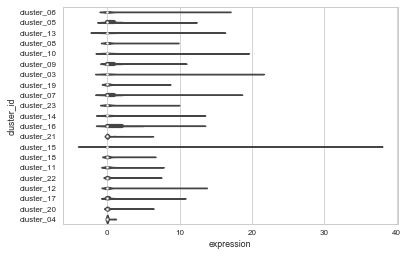

In [43]:
sns.violinplot('expression', 'cluster_id', data=figure5b_tidy_clusters)

### Using `sns.FacetGrid` to make multiple violinplots

Since we want to make a separate violinplot for each gene, we need to take multiple steps. We will use the function `sns.FacetGrid` to make mini-plots of each gene. If you want to read more about plotting on data-aware grid in Python, check out the [seaborn docs on grid plotting](http://seaborn.pydata.org/tutorial/axis_grids.html).

Let's take a look at the documentation.

In [44]:
sns.FacetGrid?

### Exercise 7

What is the first argument of `FacetGrid`? How can we specify that we want each column to be a gene symbol?

Use `sns.FacetGrid` on our `figure5b_tidy_clusters` data, specifying `"gene_symbol"` as the column in our data to use as columns in the grid.

In [45]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

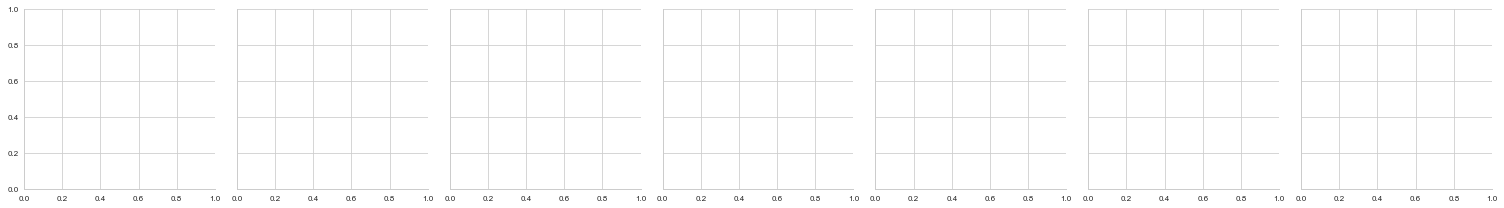

In [46]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol')
facetgrid

I have no idea which gene is where .. so let's add some titles with the convenient function `g.set_titles`

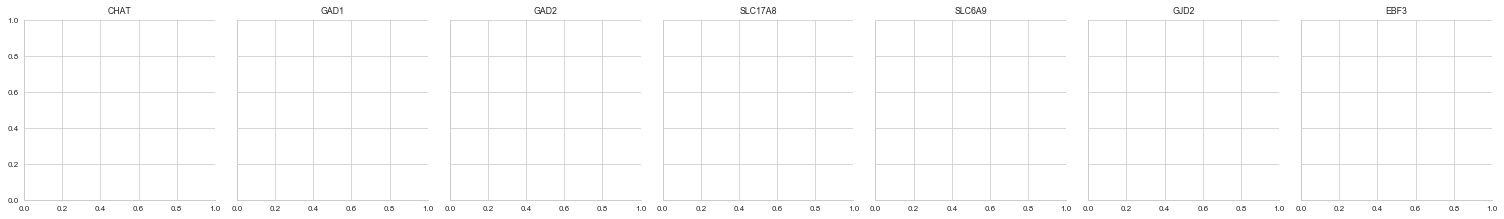

In [47]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol')
facetgrid.set_titles('{col_name}')

Now let's add our violinplots, using `map` on the `facetgrid`. Again, we'll use `"expression"` as the x-value (first argument) and `"cluster_id"` as the second argument.

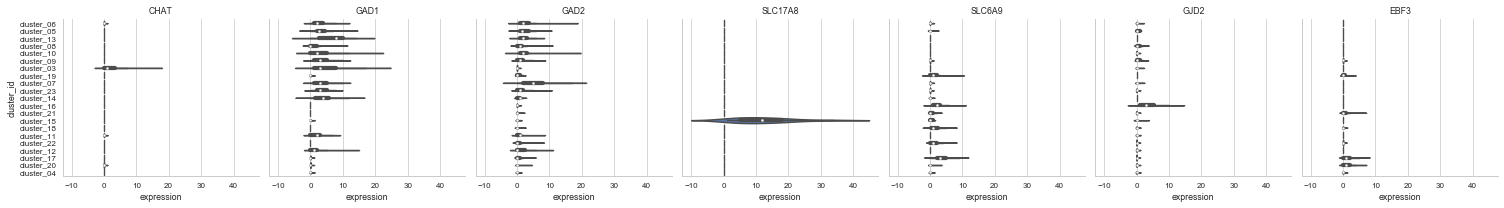

In [48]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol')
facetgrid.map(sns.violinplot, 'expression', 'cluster_id')
facetgrid.set_titles('{col_name}')

Hmm, all of these genes are on totally different scales .. how can we make it so that each gene is scaled to its own minimum and maximum?

### Exercise 8

Read the documentation for `sns.FacetGrid` and figure out how to turn of the shared values on the x axis

In [49]:
# YOUR CODE HERE

In [50]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

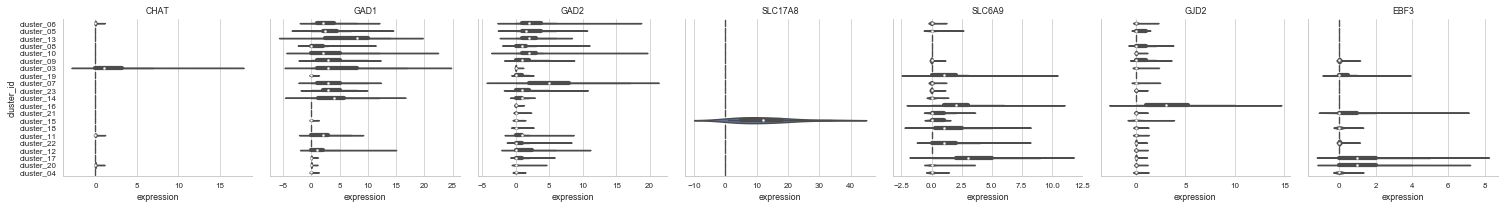

In [51]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id')
facetgrid.set_titles('{col_name}')

Okay these violinplots are still pretty weird looking. In the paper, they scale the violinplots to all be the same width, and the lines are much thinner.

Let's look at the documentation of `sns.violinplot` and see what we can do.

In [52]:
sns.violinplot?

Looks like we can set the `scale` variable to be "width" and let's try setting the `linewidth` to 1.

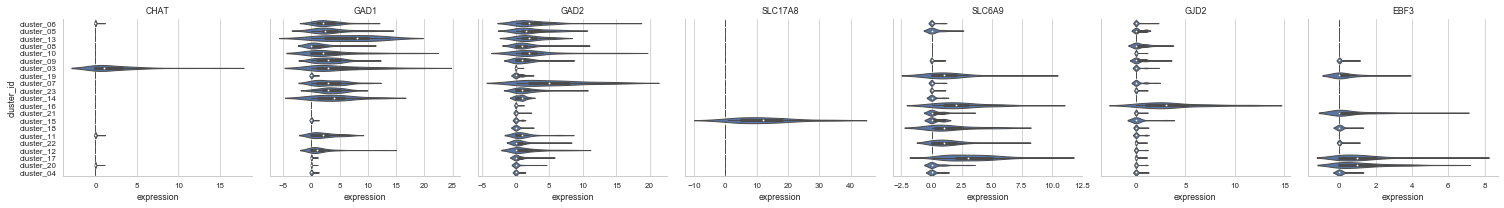

In [53]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', linewidth=1)
facetgrid.set_titles('{col_name}')

Much better! There's a few more things we need to tweak in `sns.violinplot`. Let's get rid of the dotted thing on the inside, and only show the data exactly where it's valued - the ends of the violins should be square, not pointy.

### Exercise 9

Read the documentation of sns.violinplot and add to the options to cut off the violinplots at the data bounds, and have nothing on the inside of the violins.

In [54]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

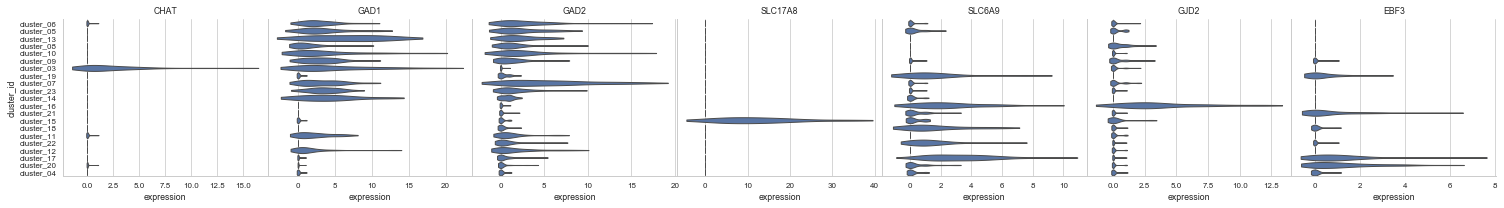

In [55]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol',
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', linewidth=1, inner=None, cut=True)
facetgrid.set_titles('{col_name}')

Okay one more thing on the violinplots ... they had a different color for every cluster, so let's do the same thing too. Right now they're all blue but let's make them all a different color. Since we have so many categories (21), and ColorBrewer doesn't have setups for when there are more than 10 colors, we need to use a different set of colors. We'll use the `"husl"` colormap, which uses perception research to make colormaps where no one color is too bright or too dark. Read more about it [here](http://www.hsluv.org/comparison/)


Here is an example of what the colormap looks like:

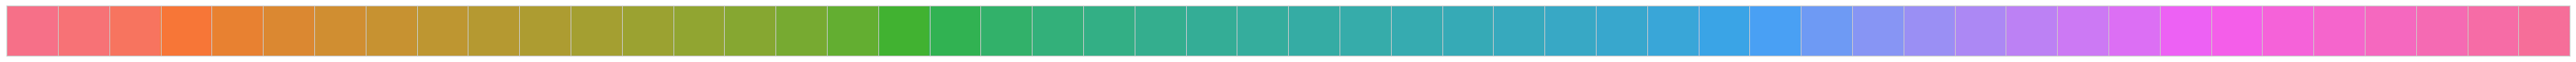

In [56]:
sns.palplot(sns.color_palette('husl', n_colors=50))

Let's add `palette="husl"` to our violinplot command and see what it does:

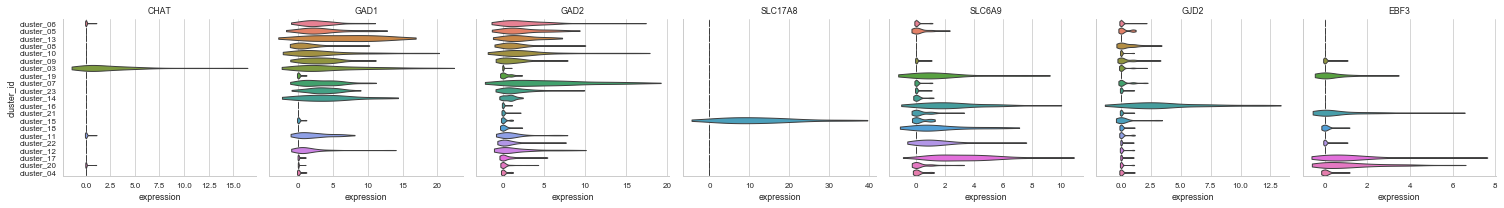

In [57]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', 
      linewidth=1, inner=None, cut=True, palette='husl')
facetgrid.set_titles('{col_name}')

Now let's work on resizing the plots so they're each narrower. We'll add the following three options to `sns.FacetGrid to accomplish this:

* `size=4` (default: `size=3`) - Make the relative size of the plot bigger
* `aspect=0.25` (default: `aspect=1`) - Make the the width of the plot be 1/4 the size of the heigh
* `gridspec_kws=dict(wspace=0)` - Set the width between plots to be zero


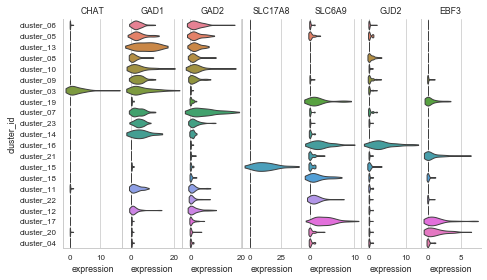

In [58]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', 
                          size=4, aspect=0.25, gridspec_kws=dict(wspace=0), 
                          sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', 
      linewidth=1, palette='husl', inner=None, cut=True)
facetgrid.set_titles('{col_name}')

Hmm.. now we can see that the clusters aren't in numeric order. Is there an option in  `sns.violinplot` that we can specify the *order* of the values?

### Exercise 10

1. Read the `sns.violinplot` documentation to figure out the keyword to use to specify the order of the clusters
2. Make a sorted list of the unique cluster ids
3. Plot the violinplots on the FacetGrid

In [59]:
# YOUR CODE HERE

In [60]:
# YOUR CODE HERE

In [61]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [62]:
cluster_order = figure5b_tidy_clusters.cluster_id.sort_values().unique()
cluster_order

array(['cluster_03', 'cluster_04', 'cluster_05', 'cluster_06',
       'cluster_07', 'cluster_08', 'cluster_09', 'cluster_10',
       'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14',
       'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18',
       'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23'], dtype=object)

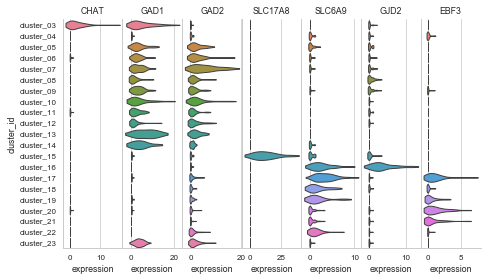

In [63]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(wspace=0), sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', 
      linewidth=1, palette='husl', inner=None, cut=True, order=cluster_order)
facetgrid.set_titles('{col_name}')

Okay one last thing .. let's turn off the "expression" label at the bottom and the value scales (since right now we're just looking comparatively) with:

    facetgrid.set(xlabel='', xticks=[])


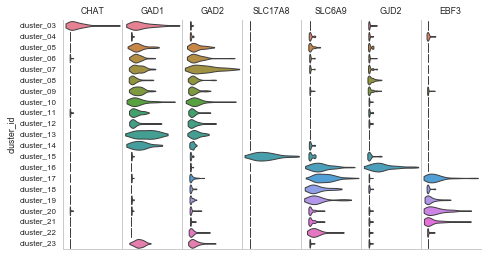

In [64]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(wspace=0), sharex=False)
facetgrid.map(sns.violinplot, 'expression', 'cluster_id', scale='width', 
      linewidth=1, palette='husl', inner=None, cut=True, order=cluster_order)
facetgrid.set(xlabel='', xticks=[])
facetgrid.set_titles('{col_name}')

### Exercise 11

#### Take a step back ... does this look like the actual Figure 5b from the paper? Do you see the bimodality that they claim?

Why or why not?

![](figures/macosko2015_figure5b.png)

YOUR ANSWER HERE

![](figures/dont_scroll.svg)

We don't see the bimodality here because they used **loggged** data, not the raw counts.

### Exercise 12

Use logged expression (which column was this in our data? Check `figure5b_tidy_clusters.head()` to remind yourself) on the facetgrid of violinplots we created.

In [65]:
# YOUR CODE HERE

In [66]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [67]:
figure5b_tidy_clusters.head()

,gene_symbol,barcode,expression,expression_log,cluster_id,celltype,cluster_n,cluster_celltype_with_id
0,CHAT,r1_GGGTGTCAGTGG,0,0.0,cluster_06,Amacrine cells,6,Amacrine cells (cluster_06)
1,CHAT,r1_GTTTATATGCGC,0,0.0,cluster_05,Amacrine cells,5,Amacrine cells (cluster_05)
2,CHAT,r1_TCTTCACTGGCT,0,0.0,cluster_13,Amacrine cells,13,Amacrine cells (cluster_13)
3,CHAT,r1_TCATTTAGTCGA,0,0.0,cluster_08,Amacrine cells,8,Amacrine cells (cluster_08)
4,CHAT,r1_GTCTATTCGGTT,0,0.0,cluster_10,Amacrine cells,10,Amacrine cells (cluster_10)


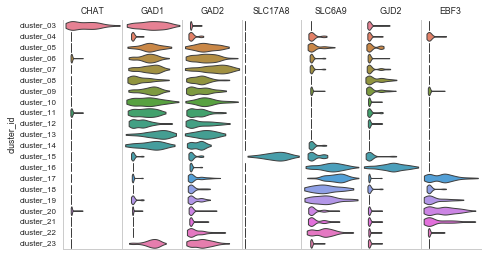

In [68]:
facetgrid = sns.FacetGrid(figure5b_tidy_clusters, col='gene_symbol', size=4, aspect=0.25,
                  gridspec_kws=dict(wspace=0), sharex=False)
facetgrid.map(sns.violinplot, 'expression_log', 'cluster_id', scale='width', 
      linewidth=1, palette='husl', inner=None, cut=True, order=cluster_order)
facetgrid.set(xlabel='', xticks=[])
facetgrid.set_titles('{col_name}')

Since we worked so hard to get these lines, let's write them as a function to a file called `plotting_code.py`. We'll move all the options we fiddled with into the arguments of our `violinplot_grid` function.

Notice we have to add `import seaborn as sns` into our file. That's because the file must be standalone and include everything it needs, including all the modules.

In [69]:
%%file plotting_code.py

import seaborn as sns

def violinplot_grid(tidy, col='gene_symbol', size=4, aspect=0.25, gridspec_kws=dict(wspace=0),
                    sharex=False, scale='width', linewidth=1, palette='husl', inner=None, 
                    cut=True, order=None):
    facetgrid = sns.FacetGrid(tidy, col=col, size=size, aspect=aspect,
                  gridspec_kws=gridspec_kws, sharex=sharex)
    facetgrid.map(sns.violinplot, 'expression_log', 'cluster_id', scale=scale, 
          linewidth=linewidth, palette=palette, inner=inner, cut=cut, order=order)
    facetgrid.set(xlabel='', xticks=[])
    facetgrid.set_titles('{col_name}')

Overwriting plotting_code.py


We can `cat` (short for con**cat**enate) the file, which means dump the contents out to the output:

In [70]:
cat plotting_code.py


import seaborn as sns

def violinplot_grid(tidy, col='gene_symbol', size=4, aspect=0.25, gridspec_kws=dict(wspace=0),
                    sharex=False, scale='width', linewidth=1, palette='husl', inner=None, 
                    cut=True, order=None):
    facetgrid = sns.FacetGrid(tidy, col=col, size=size, aspect=aspect,
                  gridspec_kws=gridspec_kws, sharex=sharex)
    facetgrid.map(sns.violinplot, 'expression_log', 'cluster_id', scale=scale, 
          linewidth=linewidth, palette=palette, inner=inner, cut=cut, order=order)
    facetgrid.set(xlabel='', xticks=[])
    facetgrid.set_titles('{col_name}')

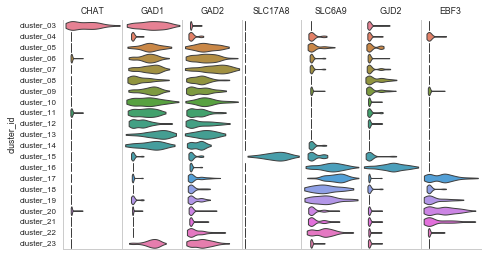

In [71]:
import plotting_code

plotting_code.violinplot_grid(figure5b_tidy_clusters, order=cluster_order)

Now we see more of the "bimodality" they talk about in the paper

## Figure 5c 

Figure 5c is all you!

### Exercise 13

Use all the amacrine cells, but this time use all the genes from Figure 5c.

Note: You may not have expression in EVERY gene .. this is a subset of the entire dataset (only run 1!) and 

![Macosko2015 Figure 5c](figures/macosko2015_figure5c.png)

In [72]:
# YOUR CODE HERE

In [73]:
# YOUR CODE HERE

In [74]:
# YOUR CODE HERE

In [75]:
# YOUR CODE HERE

In [76]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [77]:
figure5c_genes = ['Gng7', 'Gbx2', 'Tpbg', 'Slitrk6', 'Maf', 'Tac2', 'Loxl2', 'Vip', 'Glra1',
                  'Igfbp5', 'Pdgfra', 'Slc35d3', 'Car3', 'Fgf1', 'Igf1', 'Col12a1', 'Ptgds',
                  'Ppp1r17', 'Cck', 'Shisa9', 'Pou3f3']
figure5c_genes_upper = upperizer(figure5c_genes)
figure5c_expression = expression.loc[figure5b_cell_metadata.index, figure5c_genes_upper]
print(figure5c_expression.shape)
figure5c_expression.head()

(714, 21)


,GNG7,GBX2,TPBG,SLITRK6,MAF,TAC2,LOXL2,VIP,GLRA1,IGFBP5,...,SLC35D3,CAR3,FGF1,IGF1,COL12A1,PTGDS,PPP1R17,CCK,SHISA9,POU3F3
r1_GGGTGTCAGTGG,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
r1_GTTTATATGCGC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN,0.0
r1_TCTTCACTGGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0
r1_TCATTTAGTCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0
r1_GTCTATTCGGTT,1.0,0.0,0.0,1.0,0.0,0.0,2.0,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [78]:
figure5c_genes_upper

['GNG7',
 'GBX2',
 'TPBG',
 'SLITRK6',
 'MAF',
 'TAC2',
 'LOXL2',
 'VIP',
 'GLRA1',
 'IGFBP5',
 'PDGFRA',
 'SLC35D3',
 'CAR3',
 'FGF1',
 'IGF1',
 'COL12A1',
 'PTGDS',
 'PPP1R17',
 'CCK',
 'SHISA9',
 'POU3F3']

In [79]:
figure5c_tidy = tidify_and_log(figure5c_expression)
print(figure5c_tidy.shape)
figure5c_tidy.head()

(14994, 4)


,gene_symbol,barcode,expression,expression_log
0,GNG7,r1_GGGTGTCAGTGG,0.0,0.00000
1,GNG7,r1_GTTTATATGCGC,0.0,0.00000
2,GNG7,r1_TCTTCACTGGCT,0.0,0.00000
3,GNG7,r1_TCATTTAGTCGA,0.0,0.00000
4,GNG7,r1_GTCTATTCGGTT,1.0,0.30103


In [80]:
figure5c_tidy_cell_metadata = figure5c_tidy.join(cell_metadata, on='barcode')
print(figure5c_tidy_cell_metadata.shape)
figure5c_tidy_cell_metadata.head()

(14994, 8)


,gene_symbol,barcode,expression,expression_log,cluster_id,celltype,cluster_n,cluster_celltype_with_id
0,GNG7,r1_GGGTGTCAGTGG,0.0,0.00000,cluster_06,Amacrine cells,6,Amacrine cells (cluster_06)
1,GNG7,r1_GTTTATATGCGC,0.0,0.00000,cluster_05,Amacrine cells,5,Amacrine cells (cluster_05)
2,GNG7,r1_TCTTCACTGGCT,0.0,0.00000,cluster_13,Amacrine cells,13,Amacrine cells (cluster_13)
3,GNG7,r1_TCATTTAGTCGA,0.0,0.00000,cluster_08,Amacrine cells,8,Amacrine cells (cluster_08)
4,GNG7,r1_GTCTATTCGGTT,1.0,0.30103,cluster_10,Amacrine cells,10,Amacrine cells (cluster_10)


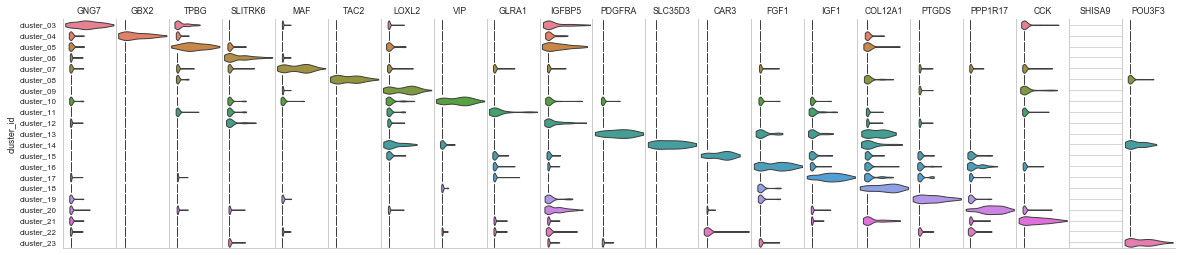

In [81]:
plotting_code.violinplot_grid(figure5c_tidy_cell_metadata, order=cluster_order, aspect=0.2)

## Let's take a step back ... What does this all mean?

They showed that for each amacrine cell cluster, they showed that one gene that was mutually exclusively **detected using single-cell RNA-seq**. And then, in Figure 5F, they showed that indeed, one of the markers is expressed in some amacrine cells but not others.

**But, single-cell RNA seq is plagued with gene dropout -- randomly, one gene will be detected in one cell but not another.**

What if there was a way that we could detect the genes that dropped out?

## Compressed Sensing/Robust PCA

[Compressed sensing](https://en.wikipedia.org/wiki/Compressed_sensing) is a field where they think about problems like, "if we only get 10% of the signal, and it's super noisy, could we reconstruct 100% of what was originally there? Turns out yes, you can! [Robust PCA](https://en.wikipedia.org/wiki/Robust_principal_component_analysis) is one of the algorithms in compressed sensing which models the data $X$ as the sum of a low-rank matrix $L$ and a sparse matrix $S$.

$X = L + S$

* $X$ is the expression data
* $L$ is the low rank data. In our case, this essentially becomes a smoothed version of the expression matrix
* $S$ is the sparse data. In our case, this captures the stochastic noise in the data. *Some of this data may be biological*, it is true. But largely, this data seems to carry the technical noise.

![Robust PCA on video](figures/robust_pca_example_cctv.jpeg)

### Cluster on raw (log2) amacrine cell expression

To understand what Robust PCA does to biological data, we first need to understand what the raw data looks like. Let's look at the gene expression in only amacrine cells, with the RAW data:

(714, 1339)


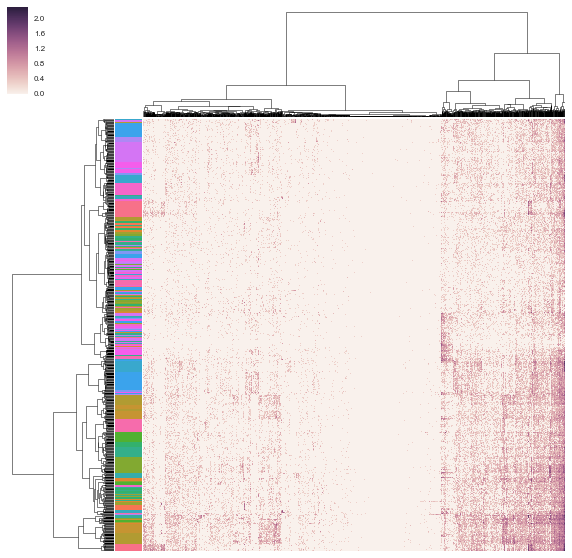

In [82]:
# Import a file I wrote with a cleaned-up clustermap
import fig_code

amacrine_cluster_n = sorted(figure5b_cell_metadata.cluster_n.unique())
amacrine_cluster_to_color = dict(zip(amacrine_cluster_n, sns.color_palette('husl', n_colors=len(amacrine_cluster_n))))
amacrine_cell_colors = [amacrine_cluster_to_color[i] for i in figure5b_cell_metadata['cluster_n']]

amacrine_expression = expression_log10.loc[figure5b_cell_metadata.index]
print(amacrine_expression.shape)

fig_code.clustermap(amacrine_expression, row_colors=amacrine_cell_colors)

### Cluster on Robust PCA'd amacrine cell expression (lowrank)

(438396, 8)


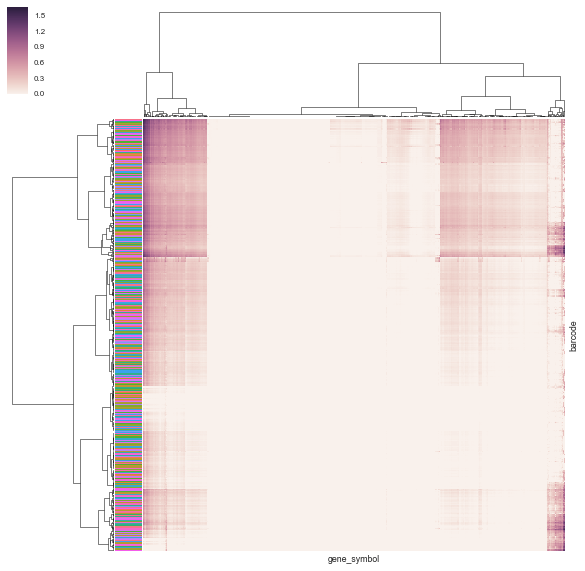

In [83]:
csv = macosko2015.BASE_URL + 'differential_clusters_lowrank_tidy_metadata_amacrine.csv'
lowrank_tidy = pd.read_csv(csv)
print(lowrank_tidy.shape)

# Reshape the data to be a large 2d matrix
lowrank_tidy_2d = lowrank_tidy.pivot(index='barcode', columns='gene_symbol', values='expression_log')

# set minimum value shown to 0 because there's a bunch of small (e.g. -1.1) negative numbers in the lowrank data
fig_code.clustermap(lowrank_tidy_2d, row_colors=amacrine_cell_colors, vmin=0)

### Figure 5b using Robust PCA data

(4998, 8)


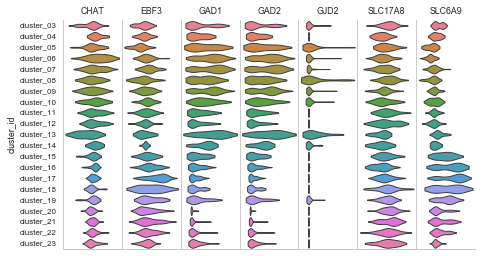

In [84]:
# Subset the genes on only figure 5b
rows = lowrank_tidy.gene_symbol.isin(figure5b_genes_upper)
lowrank_tidy_figure5b = lowrank_tidy.loc[rows]
print(lowrank_tidy_figure5b.shape)
lowrank_tidy_figure5b.head()

plotting_code.violinplot_grid(lowrank_tidy_figure5b, order=cluster_order, aspect=0.25)

Looks like a lot of the signal from the genes was recovered!

### Robust PCA data for Figure 5c

Subset the genes on only figure 5c

(12852, 8)


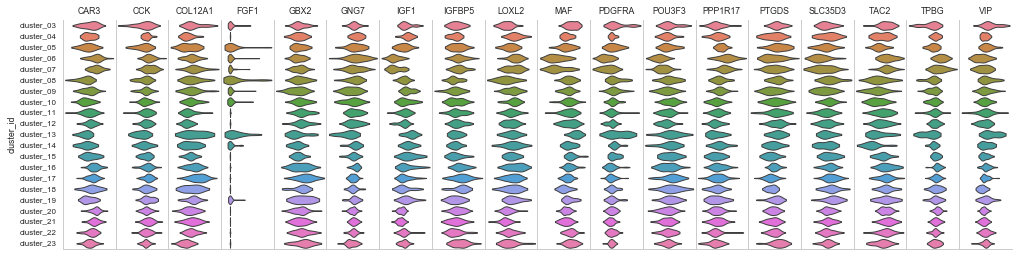

In [85]:
rows = lowrank_tidy.gene_symbol.isin(figure5c_genes_upper)
lowrank_tidy_figure5c = lowrank_tidy.loc[rows]
print(lowrank_tidy_figure5c.shape)
lowrank_tidy_figure5c.head()

plotting_code.violinplot_grid(lowrank_tidy_figure5c, order=cluster_order, aspect=0.2)

Interesting what happens to the "unique cluster identifiers" ...